<a href="https://colab.research.google.com/github/ronitjain235/codealpha/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Upload any Excel or CSV file
try:
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]  # Get uploaded file name
    print(f"Uploaded file: {file_name}")
except:
    file_name = "company_sales.xlsx"  # Default file if local
    print(f"Using local file: {file_name}")


Saving student_data.csv to student_data.csv
Uploaded file: student_data.csv


Dataset Shape: (5, 7)

Columns: ['StudentID', 'Name', 'Age', 'Gender', 'Course', 'Marks', 'Attendance (%)']

Missing Values:
 StudentID         0
Name              0
Age               0
Gender            0
Course            0
Marks             0
Attendance (%)    0
dtype: int64

Data Types:
 StudentID          int64
Name              object
Age                int64
Gender            object
Course            object
Marks              int64
Attendance (%)     int64
dtype: object

First 5 rows:
    StudentID   Name  Age  Gender  Course  Marks  Attendance (%)
0        101   Amit   20    Male  B.Tech     85              90
1        102  Priya   21  Female     MBA     78              85
2        103  Rohan   22    Male    B.Sc     92              95
3        104  Sneha   20  Female   B.Com     74              80
4        105  Vikas   23    Male  B.Tech     88              88

Summary Statistics:
          StudentID  Name       Age Gender  Course      Marks  Attendance (%)
count     5.000000 

/tmp/ipython-input-2614858869.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


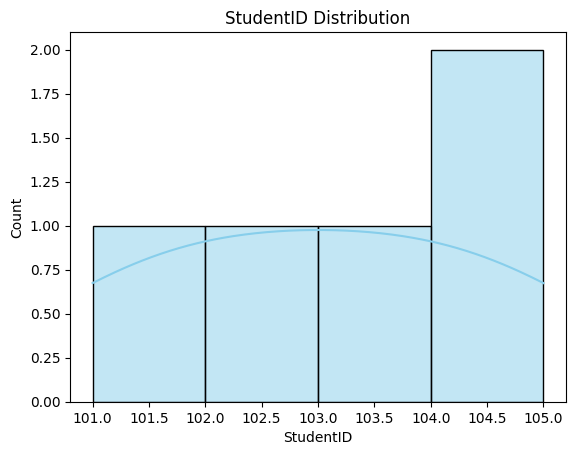

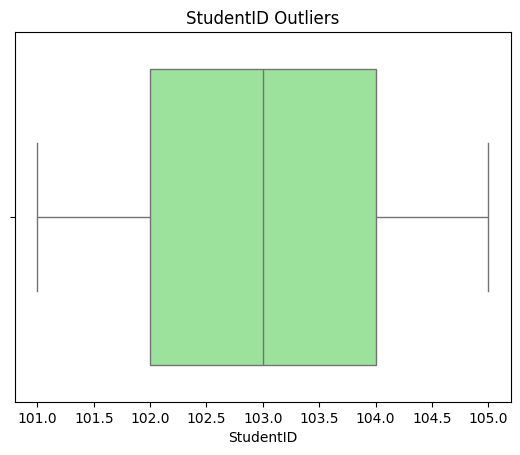

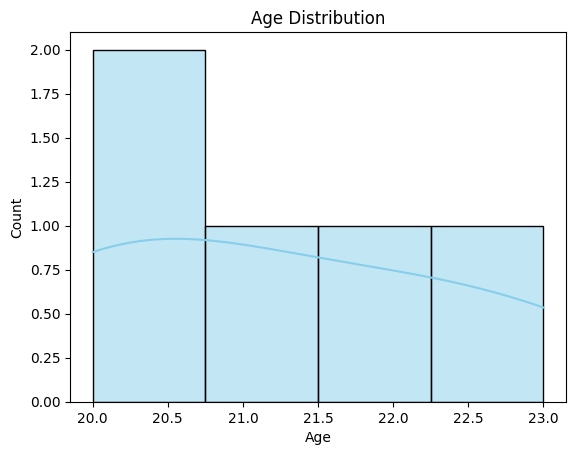

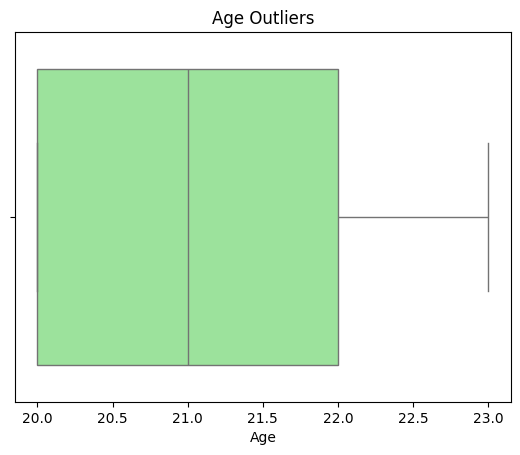

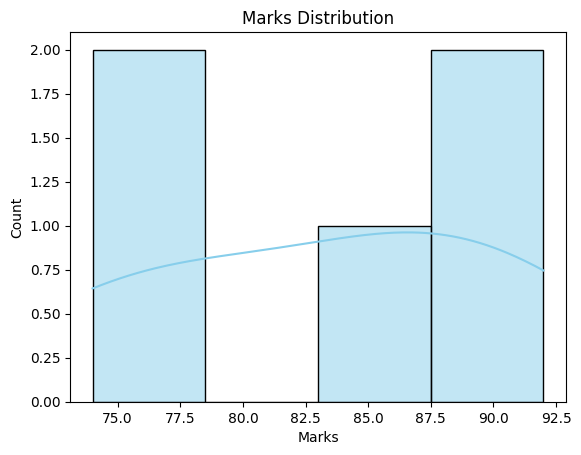

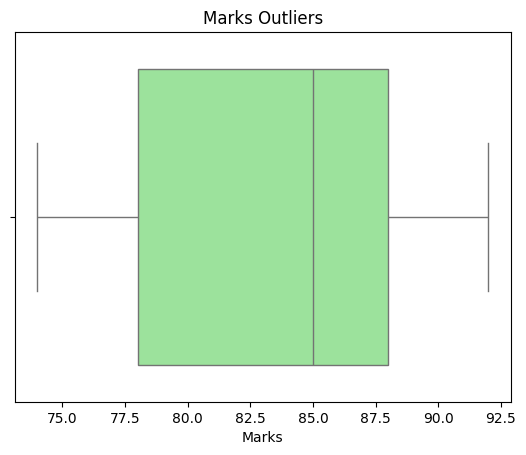

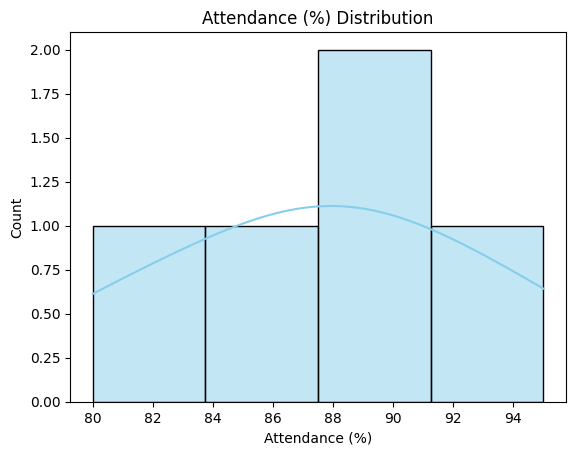

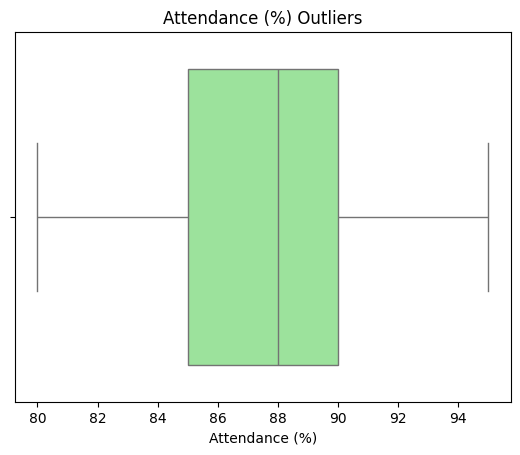

/tmp/ipython-input-2614858869.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


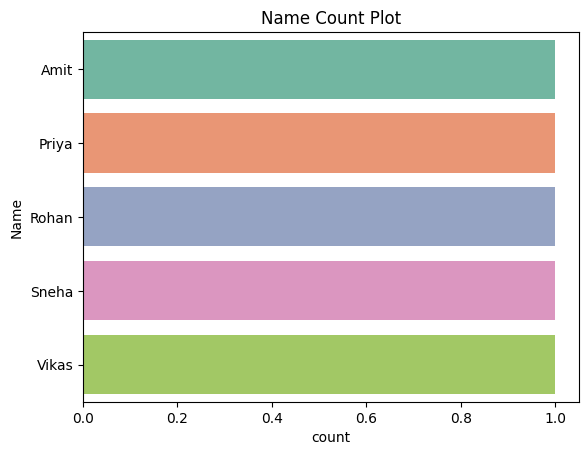

/tmp/ipython-input-2614858869.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


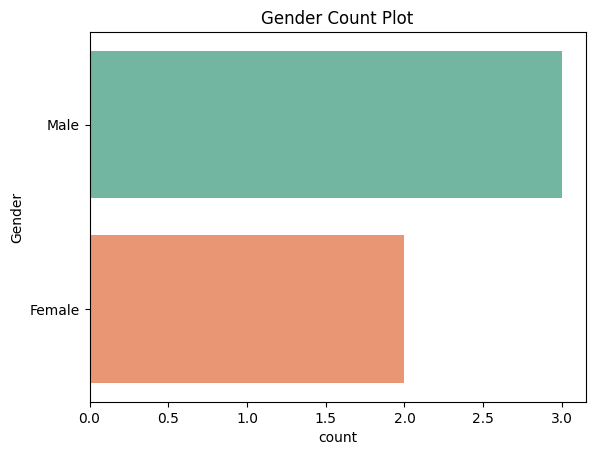

/tmp/ipython-input-2614858869.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


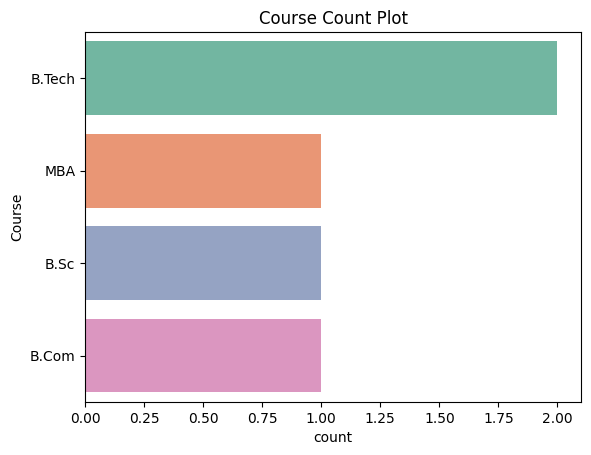

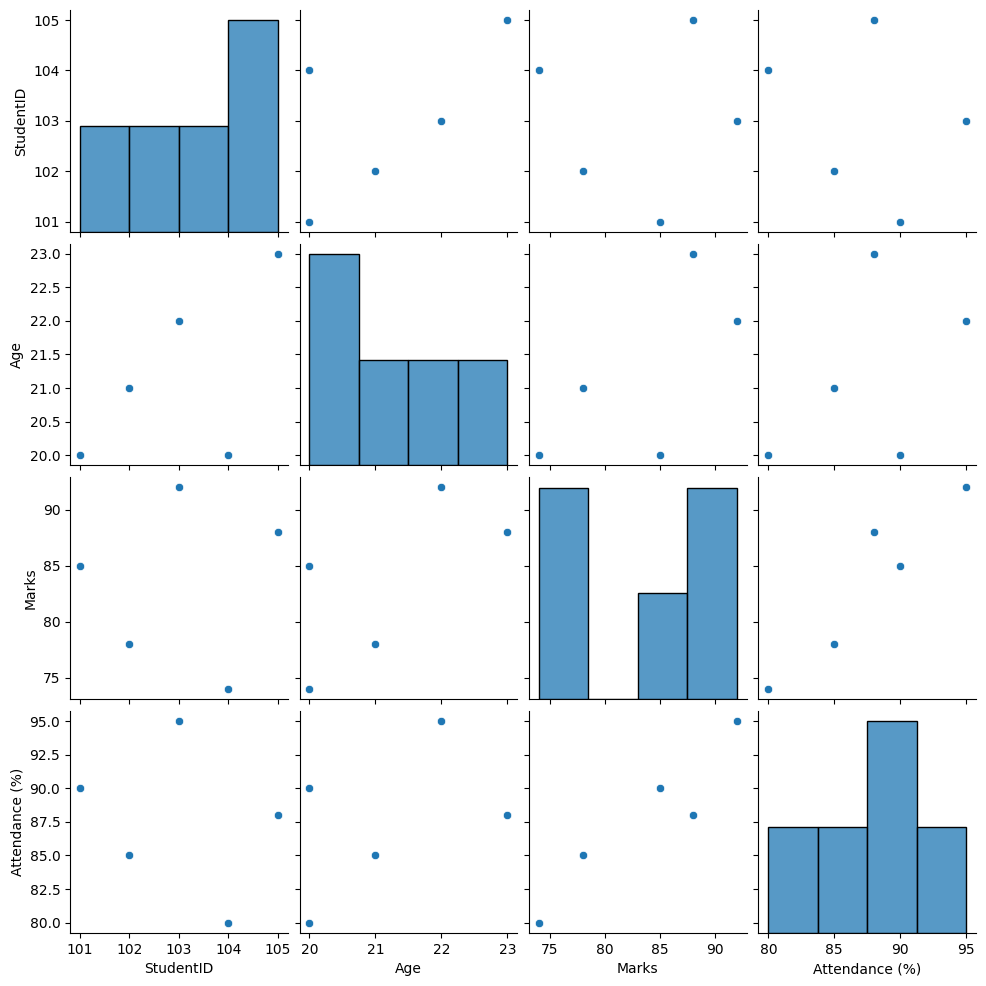

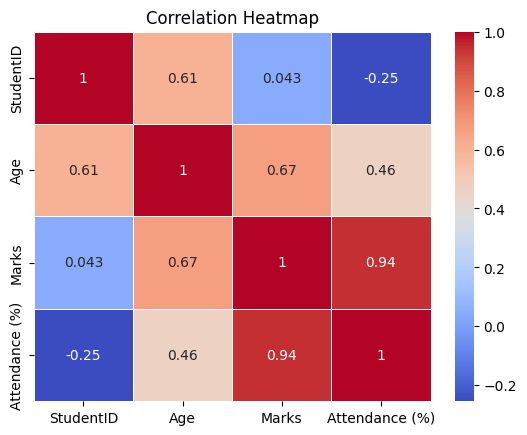


Cleaned dataset saved as 'cleaned_uploaded_data.csv'


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Detect file type and read accordingly
if file_name.endswith(".csv"):
    df = pd.read_csv(file_name)
elif file_name.endswith(".xlsx"):
    df = pd.read_excel(file_name)
else:
    raise ValueError("Unsupported file type. Upload a CSV or XLSX file.")

# -----------------------------
# Basic Info
# -----------------------------
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Handle missing numeric values
for col in df.select_dtypes(include=['float64','int64']):
    df[col].fillna(df[col].mean(), inplace=True)

# Convert date columns
for col in df.columns:
    if "date" in col.lower():
        df[col] = pd.to_datetime(df[col], errors="coerce")

# -----------------------------
# Descriptive Stats
# -----------------------------
print("\nSummary Statistics:\n", df.describe(include="all"))

# -----------------------------
# Univariate Analysis
# -----------------------------
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

# Numeric plots
for col in numeric_cols:
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} Distribution")
    plt.show()

    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} Outliers")
    plt.show()

# Categorical plots
for col in categorical_cols:
    sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"{col} Count Plot")
    plt.show()

# -----------------------------
# Bivariate & Correlation
# -----------------------------
if len(numeric_cols) >= 2:
    sns.pairplot(df[numeric_cols])
    plt.show()

if len(numeric_cols) >= 2:
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

# -----------------------------
# Save cleaned dataset
# -----------------------------
df.to_csv("cleaned_uploaded_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_uploaded_data.csv'")
